In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from collections import Counter 

from swarm_sim import *

%matplotlib inline 

In [2]:
PATH = '..\data\Traces_Nanosatellites\\track_'
satellites = {}

for i in range(0,100):
    df = pd.read_csv(PATH+str(i)+'.csv', sep=',', header=0)
    df['coords'] = ['x','y','z']
    satellites[i] = df.set_index('coords', drop=True)
    
DURATION = satellites[0].columns.tolist()
CHUNKS = 2000     # Number of timestamps to analyse
NB_NODES = 100

satellites[0].head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


In [37]:
CONNECTION_RANGE = 30000
t = '0'

swarm_data = Swarm(
    connection_range=CONNECTION_RANGE, 
    nodes=[Node(id, node[t].x, node[t].y, node[t].z) for id,node in satellites.items()]
)

print(swarm_data)
neighbor_matrix = swarm_data.neighbor_matrix()

Swarm of 100 node(s), connection range: 30000


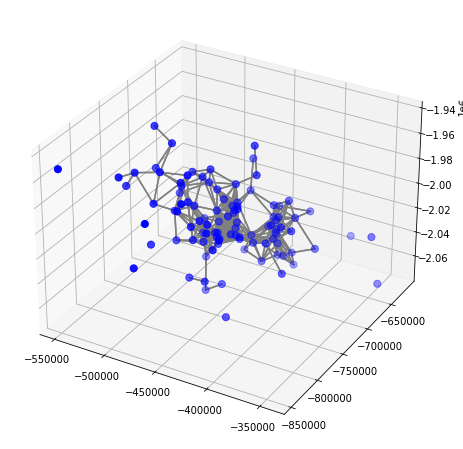

In [38]:
swarm_data.plot_edges()

### Random community assignment

In [39]:
clist = range(10)
sf = range(1,31)

comm_data = {} # Dict(comm_id:list(count))
for i in clist:
    comm_data[i] = []

for i in sf:
    swarm_data.random_community(clist, i)
    communities = [n.community for n in swarm_data.nodes]
    distrib = Counter(communities)
    for k in comm_data.keys():
        comm_data[k].append(distrib[k])
        
for k,v in comm_data.items():
    print(k,v)

0 [7, 7, 11, 9, 8, 13, 15, 13, 9, 9, 16, 8, 16, 15, 8, 11, 8, 11, 12, 11, 14, 18, 9, 7, 7, 15, 11, 14, 13, 9]
1 [13, 14, 8, 10, 12, 13, 13, 11, 7, 10, 14, 12, 8, 14, 6, 9, 18, 14, 11, 9, 10, 13, 13, 14, 7, 11, 12, 12, 13, 10]
2 [9, 12, 10, 9, 13, 11, 9, 8, 17, 11, 8, 9, 5, 7, 8, 6, 8, 17, 9, 12, 7, 6, 8, 10, 9, 7, 12, 7, 10, 7]
3 [12, 11, 16, 10, 11, 12, 4, 6, 11, 10, 5, 12, 15, 6, 18, 7, 8, 12, 13, 11, 10, 9, 6, 11, 9, 12, 7, 8, 13, 11]
4 [9, 6, 5, 11, 11, 5, 11, 17, 5, 10, 7, 9, 8, 4, 9, 18, 6, 4, 6, 14, 5, 7, 13, 12, 12, 15, 5, 8, 9, 10]
5 [8, 10, 9, 10, 7, 8, 7, 4, 8, 8, 8, 6, 9, 8, 10, 6, 9, 5, 9, 6, 4, 8, 10, 6, 13, 10, 10, 5, 8, 9]
6 [10, 10, 9, 16, 13, 12, 8, 10, 10, 10, 12, 11, 4, 15, 9, 8, 11, 8, 14, 11, 11, 9, 11, 10, 12, 3, 9, 14, 7, 11]
7 [13, 11, 11, 11, 6, 8, 16, 14, 12, 10, 9, 10, 12, 14, 10, 17, 15, 13, 3, 10, 20, 10, 12, 12, 15, 12, 14, 16, 9, 11]
8 [10, 9, 9, 6, 9, 4, 9, 7, 8, 9, 8, 5, 10, 6, 10, 9, 7, 3, 14, 5, 6, 9, 11, 7, 7, 7, 11, 8, 10, 7]
9 [9, 10, 12, 8, 10, 1

In [40]:
comm_avg, comm_std = {}, {}

for k,v in comm_data.items():
    comm_avg[k] = np.mean(v)
    comm_std[k] = np.std(v)

for k in comm_data.keys():
    print(k, 'Avg:', comm_avg[k], '\tStd:', comm_std[k])

0 Avg: 11.133333333333333 	Std: 3.1488975142985445
1 Avg: 11.366666666666667 	Std: 2.6138519893487127
2 Avg: 9.366666666666667 	Std: 2.8104961997641786
3 Avg: 10.2 	Std: 3.1874754901018454
4 Avg: 9.033333333333333 	Std: 3.7459607875980527
5 Avg: 7.933333333333334 	Std: 2.0154955277107964
6 Avg: 10.266666666666667 	Std: 2.756003547812585
7 Avg: 11.866666666666667 	Std: 3.303869784897031
8 Avg: 8.0 	Std: 2.265686062395524
9 Avg: 10.833333333333334 	Std: 2.477678124553084


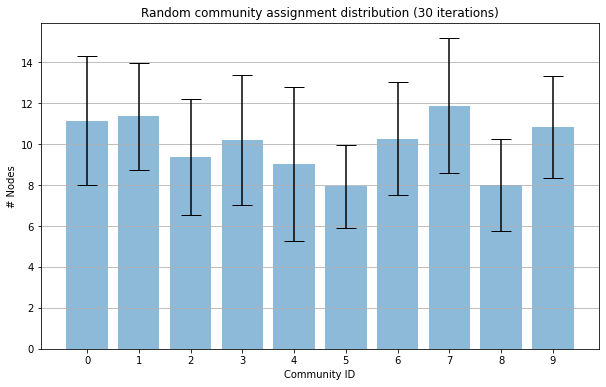

In [41]:
labels = clist
x_pos = np.arange(len(labels))
ctes = [v for v in comm_avg.values()]
errors = [v for v in comm_std.values()]

# Build the plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x_pos, ctes,
       yerr=errors,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_xlabel('Community ID')
ax.set_ylabel('# Nodes')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Random community assignment distribution (30 iterations)')
ax.yaxis.grid(True)

### Metrics analysis
- Degree
- Clustering coefficient
- Number of connected components

In [42]:
# Separate communities into swarms
swarms = {} #Dict(comm_id:Swarm)
for i in clist:
    swarms[i] = Swarm(connection_range=30000,
                      nodes=[node for node in swarm_data.nodes if node.community==i])
    neighbor_matrix = swarms[i].neighbor_matrix()

In [62]:
def DFSUtil(sw, temp, node, visited):
    visited[node.id] = True
    temp.append(node.id) # Store the vertex to list
    for n in node.neighbors:
        if n in sw.nodes:
            if visited[n.id] == False:
                temp = DFSUtil(sw, temp, n, visited)
    return temp

def connected_components(sw):
        """
        Function to define the connected components in the network, and print their number.

        Returns:
            cc (List(List(int))): nested list of node ids for each connected component
        """
        visited = {}
        for node in sw.nodes:
            visited[node.id] = False
        cc = []
        for node in sw.nodes:
            if visited[node.id]==False:
                temp = []
                cc.append(DFSUtil(sw, temp, node, visited))
        return cc

In [63]:
degrees, cluster_coefs, ccs = {}, {}, {}
for k,sw in swarms.items():
    degrees[k] = np.mean(sw.degree())
    cluster_coefs[k] = np.mean(sw.cluster_coef())    
    ccs[k] = len(connected_components(sw))

In [64]:
x = 2
print('Reference values (whole swarm)')
print('\tAverage degree:', round(np.mean(swarm_data.degree()), x))
print('\tAverage clustering coefficient:', round(np.mean(swarm_data.cluster_coef()), x))
print('\tNumber of connected components:', len(connected_components(swarm_data)))

print('\nCommunity values')
print('\tAverage degrees:', [round(np.mean(sw.degree()), x) for sw in swarms.values()])
print('\tAverage clustering coefficients:', [round(np.mean(sw.cluster_coef()), x) for sw in swarms.values()])
print('\tNumber of connected components:', [len(connected_components(sw)) for sw in swarms.values()])

Reference values (whole swarm)
	Average degree: 8.54
	Average clustering coefficient: 0.48
	Number of connected components: 10

Community values
	Average degrees: [8.89, 6.2, 13.0, 7.64, 9.1, 6.78, 7.64, 7.55, 12.14, 8.87]
	Average clustering coefficients: [0.4, 0.31, 0.55, 0.5, 0.59, 0.53, 0.49, 0.43, 0.57, 0.47]
	Number of connected components: [8, 9, 4, 7, 7, 9, 7, 7, 5, 5]


In [70]:
ref_deg = np.mean(swarm_data.degree())
ref_cluster = np.mean(swarm_data.cluster_coef())
ref_cc = len(connected_components(swarm_data))

data_deg = np.array([np.mean(sw.degree()) for sw in swarms.values()])
data_cluster = np.array([np.mean(sw.cluster_coef()) for sw in swarms.values()])
data_cc = np.array([len(connected_components(sw)) for sw in swarms.values()])

std_deg = np.sqrt(np.mean((data_deg - ref_deg)**2))
std_cluster = np.sqrt(np.mean((data_cluster - ref_cluster)**2))
std_cc = np.sqrt(np.mean((data_cc - ref_cc)**2))

print('Standard deviations with respect to reference values')
print('\tDegree:', round(std_deg, 2))
print('\tClustering coefficient:', round(std_cluster, 2))
print('\tNumber of connected components:', round(std_cc, 2))

Standard deviations with respect to reference values
	Degree: 2.11
	Clustering coefficient: 0.08
	Number of connected components: 3.58


Text(0, 0.5, '# Nodes')

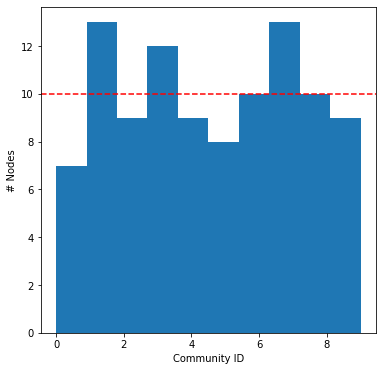

In [26]:
data = sorted(distrib.elements())
avg = np.mean([distrib[i] for i in range(10)])

plt.figure(figsize=(6,6))
plt.hist(data, bins=10)
plt.axhline(avg, ls='--', c='red')
plt.xlabel('Community ID')
plt.ylabel('# Nodes')


In [35]:
sample = swarm_data.RD_sample(s=3, rho=0.5, x=10)
print(sample)

for n in sample.nodes:
    print(n)

Swarm of 17 node(s), connection range: 30000
Node ID 75 (-460906.191931025,-696867.737112933,-2019954.11729961) has 12 neighbor(s)
Node ID 69 (-418943.581316989,-660998.490948178,-2066428.89277185) has 5 neighbor(s)
Node ID 30 (-427959.488377566,-678753.5060083,-2024893.78965431) has 12 neighbor(s)
Node ID 42 (-450952.902645269,-710054.410536799,-2020571.46456492) has 21 neighbor(s)
Node ID 70 (-453771.463342908,-707451.881877579,-2026980.60100715) has 17 neighbor(s)
Node ID 77 (-440508.738259234,-669316.570991654,-2036346.91962709) has 14 neighbor(s)
Node ID 9 (-450570.052895477,-709565.244861892,-2007467.58188223) has 18 neighbor(s)
Node ID 62 (-427089.318055498,-677293.984289381,-2053876.58278305) has 12 neighbor(s)
Node ID 6 (-423822.113747743,-693079.060304235,-2033733.90184913) has 16 neighbor(s)
Node ID 33 (-448233.574068356,-717533.949100457,-2027625.52938778) has 23 neighbor(s)
Node ID 68 (-425287.847273978,-685153.724397357,-2031865.57457557) has 18 neighbor(s)
Node ID 39 (-4

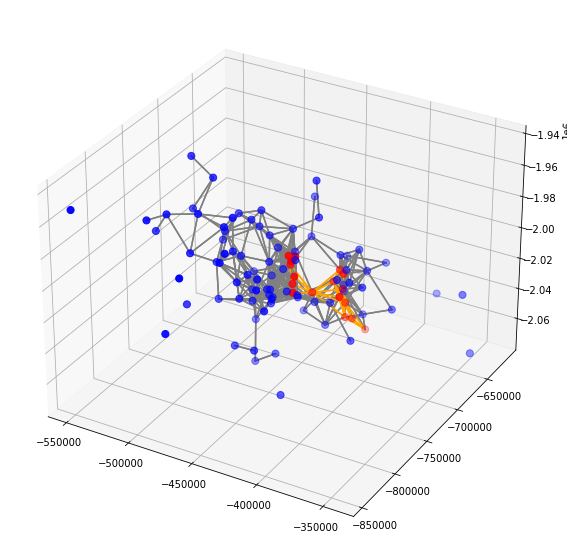

In [36]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
swarm = swarm_data

x_data, x_sample = [], []
y_data, y_sample = [], []
z_data, z_sample = [], []

for node in swarm.nodes:
    if node in sample.nodes:
        x_sample.append(node.x)
        y_sample.append(node.y)
        z_sample.append(node.z)
    else:
        x_data.append(node.x)
        y_data.append(node.y)
        z_data.append(node.z)

ax.scatter(x_data, y_data, z_data, c='blue', s=50)
ax.scatter(x_sample, y_sample, z_sample, c='red', s=50)

for node in swarm.nodes:
    for n in node.neighbors:
        if node in sample.nodes and n in sample.nodes:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='orange')
        else:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='gray')

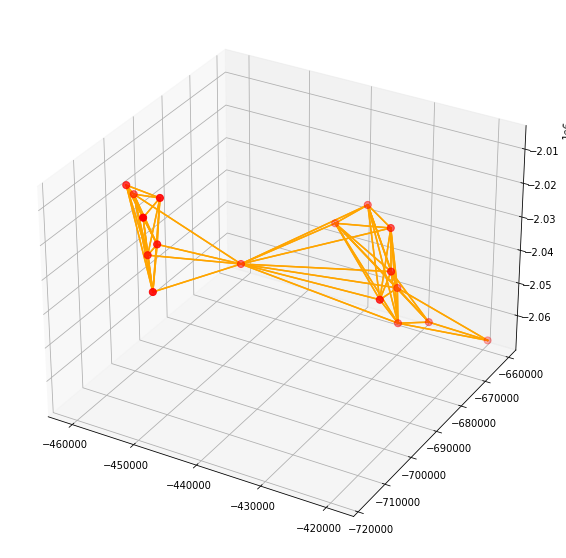

In [37]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

x_data = [node.x for node in sample.nodes]
y_data = [node.y for node in sample.nodes]
z_data = [node.z for node in sample.nodes]
ax.scatter(x_data, y_data, z_data, c='red', s=50)

for node in sample.nodes:
    for n in node.neighbors:
        if n in sample.nodes:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='orange')

In [38]:
def random_sample(swarm, rho=0.33, x=1): 
    seeds = swarm.random_jump(1) # Initial random seed
    sample = Swarm(swarm.connection_range, nodes=seeds)
    while len(sample.nodes) < x:
        new_seeds = []
        for w in seeds:
            neigh = w.neighbors
            new_seeds.extend(neigh[:int(np.ceil(len(neigh)*rho))]) # Keep first rho nodes
        for node in list(set(new_seeds)):  # Remove duplicates and add to sample
            sample.add_node(node)
        seeds = new_seeds
        if [n.degree() for n in seeds] == [1]*len(seeds): # If all seeds are leaves
            seeds = swarm.random_jump(1) # Perform random jump again
    return sample


In [45]:
sample_rand = random_sample(swarm_data, rho=0.2, x=10)
print(sample_rand)

for n in sample_rand.nodes:
    print(n)

Swarm of 10 node(s), connection range: 30000
Node ID 17 (-449626.879830037,-717156.33612937,-2007519.44783608) has 22 neighbor(s)
Node ID 9 (-450570.052895477,-709565.244861892,-2007467.58188223) has 18 neighbor(s)
Node ID 19 (-469605.484619407,-708682.82459046,-2024723.26970388) has 16 neighbor(s)
Node ID 7 (-463822.377904549,-710055.708861518,-2004695.14938024) has 15 neighbor(s)
Node ID 11 (-458066.47668205,-734366.762447103,-2024861.7874912) has 16 neighbor(s)
Node ID 5 (-454635.955971816,-739467.088967822,-2018777.33234731) has 16 neighbor(s)
Node ID 0 (-485074.678663292,-706653.009498108,-2026363.46336954) has 4 neighbor(s)
Node ID 27 (-440943.643999818,-724705.966738243,-2024699.57585678) has 19 neighbor(s)
Node ID 24 (-458650.714684382,-736440.663221295,-2020757.15078701) has 15 neighbor(s)
Node ID 1 (-416730.457242747,-711449.610260252,-2013985.12080213) has 6 neighbor(s)


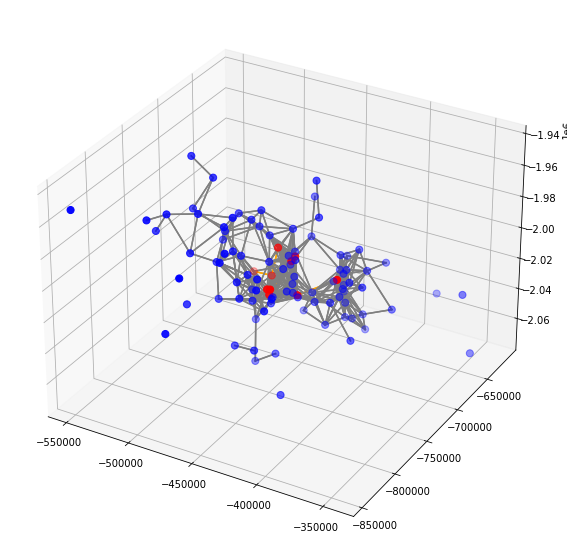

In [46]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
s1 = swarm_data
s2 = sample_rand

x_data, x_sample = [], []
y_data, y_sample = [], []
z_data, z_sample = [], []

for node in s1.nodes:
    if node in s2.nodes:
        x_sample.append(node.x)
        y_sample.append(node.y)
        z_sample.append(node.z)
    else:
        x_data.append(node.x)
        y_data.append(node.y)
        z_data.append(node.z)

ax.scatter(x_data, y_data, z_data, c='blue', s=50)
ax.scatter(x_sample, y_sample, z_sample, c='red', s=50)

for node in s1.nodes:
    for n in node.neighbors:
        if node in s2.nodes and n in s2.nodes:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='orange')
        else:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='gray')

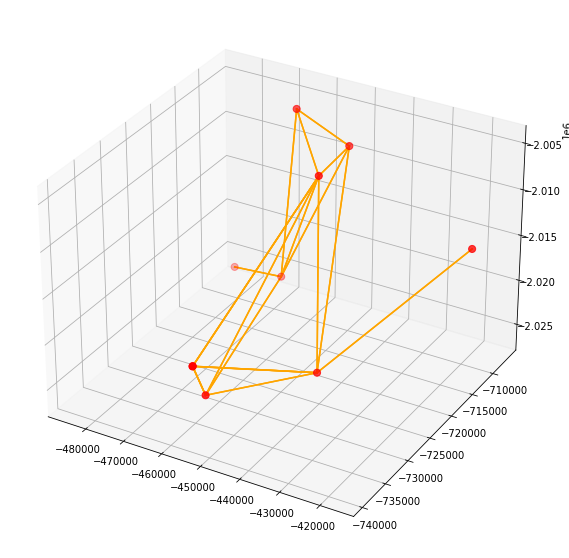

In [47]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
swarm = sample_rand

x_data = [node.x for node in swarm.nodes]
y_data = [node.y for node in swarm.nodes]
z_data = [node.z for node in swarm.nodes]
ax.scatter(x_data, y_data, z_data, c='red', s=50)

for node in swarm.nodes:
    for n in node.neighbors:
        if n in swarm.nodes:
            ax.plot([node.x, n.x], [node.y, n.y], [node.z, n.z], c='orange')